# 8. 분류 모델 평가하기

### Confusion matrix

Confusion matrix는 supervised learning에서 모델을 학습시킨 뒤, 모델에서 데이터의 X값을 집어넣어 얻어진 예상되는 y값과, 실제 데이터의 Y값을 비교하여 정확히 분류 되었는지 확인하는 메트릭(metric)이라고 할 수 있다.

<img src="./img/8-1.png" width="400" height="400"></img>

- 양성인데, 양성으로 제대로 검출된것은 True Positive (TP)
- 음성인데 음성으로 제대로 검출된것은 True Negative (TN)
- 양성인데 음성으로 잘못 검출된것은 False Negative (FN)
- 음성인데 양성으로 잘못 검출된것은 False Positive (FP)

ref) https://bcho.tistory.com/1206

### Accuracy(정확도)
전체 데이타중에서, 제대로 분류된 데이타의 비율<br>
ACC = (TP + TN)  / (전체 데이타 수 = P + N)
<img src="./img/8-2.png" width="200" height="200"></img>

### Error Rate
Accuracy 와 반대로, 전체 데이타 중에서 잘못 분류한 비율
ERR = (FN+FP) / (전체 데이타수 = P+N)
<img src="./img/8-3.png" width="200" height="200"></img>

### Precision(정밀도)
Positive로 예측한 내용 중에, 실제 Positive의 비율
PREC = TP / (TP+FP)
<img src="./img/8-4.png" width="200" height="200"></img>

### Recall(재현율, TPR) 
SN = (TP) / P
<img src="./img/8-5.png" width="200" height="200"></img>

### FPR(False Positive Rate)
FPR = FP / N
<img src="./img/8-6.png" width="200" height="200"></img>

In [3]:
# 정확도(acurracy), 정밀도(precision), 재현율(recall)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pandas as pd

def main():
    # 실제 값
    y_true = pd.Series(
        ["not mafia", "not mafia", "mafia", "not mafia", "mafia", 
        "not mafia", "not mafia", "mafia", "not mafia", "not mafia"]
        )
    # 예측된 값
    y_pred = pd.Series(
        ["mafia", "mafia", "not mafia", "not mafia", "mafia", 
        "not mafia", "not mafia", "mafia", "not mafia", "not mafia"]
        )
    
    print("1. Confusion Matrix :\n",pd.crosstab(y_pred, y_true, rownames=['Predicted'], colnames=['Actual'], margins=True))
    
    
    # 1. '실행 버튼을 클릭 해, 마피아(mafia)와 시민(not mafia)으로 분류 된 confusion matrix를 확인 해 보세요.
    
    
    # 2. 실행시킨 값을 토대로 마피아를 제대로 분석했는 지에 대한 recall, precision, accuracy를 구해 보세요.
    # 숫자 0을 지우고 직접 공식에 대입해 각각 값을 입력해 보세요.
    accuracy = (2+5)/10
    
    precision = 2/4
    
    recall = 2/3
    
    
    # 3. 실제 정답과 비교해 보세요.
    print("\n\n3. Result :")
    if accuracy == accuracy_score(y_true, y_pred) :
        print("accuracy : %.2f 으로, 정확히 일치합니다." % (accuracy_score(y_true, y_pred)))
    else :
        print("accuracy 가 일치하지 않습니다. 값을 확인해 주세요!")
        
    if precision == precision_score(y_true, y_pred, average=None)[0] :
        print("precision : %.2f 으로, 정확히 일치합니다." % (precision_score(y_true, y_pred, average=None)[0]))
    else :
        print("precision 이 일치하지 않습니다. 값을 확인해 주세요!")
        
    if recall == recall_score(y_true, y_pred, average=None)[0] :
        print("recall : %.2f 으로, 정확히 일치합니다." % (recall_score(y_true, y_pred, average=None)[0]))
    else :
        print("recall 이 일치하지 않습니다. 값을 확인해 주세요!")
        
    # 4. 주석을 풀고, classification report를 확인해보세요.
    print("\n\n4. Classification report : \n", classification_report(y_true, y_pred))


if __name__ == "__main__":
    main()

1. Confusion Matrix :
 Actual     mafia  not mafia  All
Predicted                       
mafia          2          2    4
not mafia      1          5    6
All            3          7   10


3. Result :
accuracy : 0.70 으로, 정확히 일치합니다.
precision : 0.50 으로, 정확히 일치합니다.
recall : 0.67 으로, 정확히 일치합니다.


4. Classification report : 
               precision    recall  f1-score   support

       mafia       0.50      0.67      0.57         3
   not mafia       0.83      0.71      0.77         7

   micro avg       0.70      0.70      0.70        10
   macro avg       0.67      0.69      0.67        10
weighted avg       0.73      0.70      0.71        10



### AUC - ROC Curve

AUC - ROC curve 는 분류 문제에서 다양한 환경 변수를 세팅하여 모델을 만들었을 때, 모델의 성능이 얼마나 좋은 지를 확인하는 척도

**ROC** (Receiver Operating Characteristic curve)는 확률 곡선을 나타내고<br>
**AUC** (the Area Under a ROC Curve)는 그 곡선 아래의 면적을 나타냅니다. AUC가 높을수록 (면적이 클수록) 모델이 Class 0을 Class0, Class 1을 Class1로 잘 분류한다고 할 수 있다.

---
### sklearn.metrics 서브 패키지
- roc_curve(y_true, y_pred) -> fpr, tpr : 실제 테스트 데이터의 y값과 모델로 예측하여 얻은 y값 사이의 관계를 파악하기 위해 값을 넣어주면, FPR(False Positive Rate), TPR(True Positive Rate)를 리턴해줍니다.
- auc(fpr, tpr) : fpr, tpr로부터 계산된 결과를 ROC Curve에 그릴 수 있도록 영역을 지정합니다.

(178, 3)
3


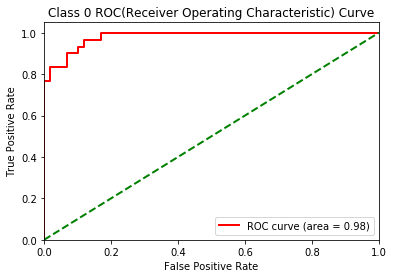

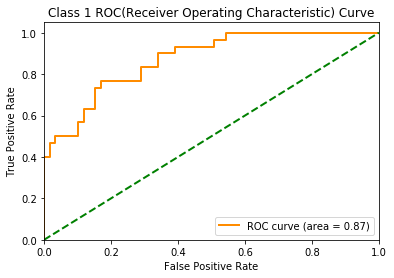

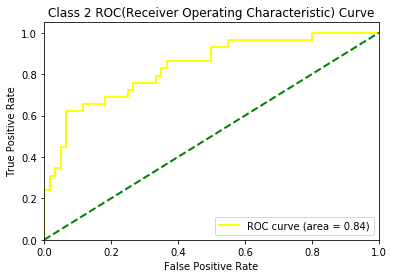

In [1]:
# ROC Curve & AUC 그리기

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def main():
    # 와인 데이터를 불러옵니다.
    wine = datasets.load_wine()
    # X와 Y 데이터를 나눕니다.
    X = wine.data
    y = wine.target

    # class를 숫자로 변환시켜줍니다.
    y = label_binarize(y, classes=[0, 1, 2])
    
    # y의 shape(data의 dimension)을 확인해보세요.
    print(y.shape)
    
    ## 1. y에 해당하는 클래스가 몇 개인지 확인해보세요.
    n_classes = y.shape[1]
    print(n_classes)
    
    # 약간의 noise를 넣어서 문제를 좀 더 변동성 있게 만듭니다.
    random_state = np.random.RandomState(123)
    n_samples, n_features = X.shape
    X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

    # Training / test data를 나눠줍니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=123)

    # SVM을 활용하여 모델링 및 학습을 진행 합니다.
    random_state = np.random.RandomState(0)
    classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)

    # 각 클래스의 ROC Curve 값을 계산하여 넣어 줄 변수를 선언합니다.
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # ROC curve를 사용하여 분류 성능을 확인해 봅시다.
    for i in range(n_classes):
        ## 2. roc_curve() 함수에 y_test의 i번째 열, y_score의 i번째 열을 입력 인자로 넣어 fpr[i], tpr[i]의 값을 획득하세요.
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i],y_score[:,i])

        ## 3. auc() 함수에 fpr[i], tpr[i]를 입력 인자로 넣어 각각의 클래스에서의 ROC & AUC 값을 획득하세요.
        roc_auc[i] = auc(fpr[i], tpr[i])

    for nth_class in range(n_classes):
        plot_ROC_curve(fpr, tpr, roc_auc, nth_class)
    
    
# ROC curve를 그리기 위해 사용되는 함수입니다.
def plot_ROC_curve(fpr, tpr, roc_auc, nth_class):

    plt.figure()
    lw = 2
    
    color_name = ''
    if nth_class == 0:
        color_name = 'red'
    elif nth_class == 1 :
        color_name = 'darkorange'
    else :
        color_name = 'yellow'
        
    plt.plot(fpr[nth_class], tpr[nth_class], color=color_name,
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nth_class])
    plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %s ROC(Receiver Operating Characteristic) Curve' %nth_class)
    plt.legend(loc="lower right")
    

if __name__ == "__main__":
    main()

### F1 - Score

F1-Score는 테스트의 정확도를 측정하는 척도입니다.

앞서 배웠던 precision p 와 recall r 을 가지고 점수를 계산하게 됩니다. p는 분류기에서 계산된 전체 positive 결과 중에 실제 값이 positve 결과인 비율을 나타냅니다. r은 실제 positive로 나타난 전체 결과값 중에 분류기에서 계산되어 옳게 판단 된 positve 값을 비율로 나타낸 값입니다.

F1 score는 precision과 recall의 조화평균으로 계산됩니다. 값이 1에 가까워질수록 더 높은 정확도를 가지게 됩니다.

---
### sklearn.metrics 서브 패키지
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
- f1_score(y_true, y_pred, average='macro') 
    - macro
    - micro
    - weighted
    - None

In [2]:
# F1 - Score 실습

import numpy as np
from sklearn.metrics import f1_score
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

def main():
	
    ## y_true, y_pred를 다음과 같이 정의합니다.
    y_true = ["apple", "banana", "cherry", "grape", "banana", "banana", "apple", "grape"]
    y_pred = ["grape", "banana", "cherry", "grape", "cherry", "grape", "apple", "grape"]
    
    # 1. average 값을 다르게 설정하여 f1 score를 출력해 보세요.
    f1_score_macro = f1_score(y_true,y_pred,average='macro')
    f1_score_micro = f1_score(y_true,y_pred,average='micro')
    f1_score_weighted = f1_score(y_true,y_pred,average='weighted')
    f1_score_None = f1_score(y_true,y_pred,average=None)
    
    print("F1_Score_macro = ", f1_score_macro)
    print("F1_Score_micro = ", f1_score_micro)
    print("F1_Score_weighted = ", f1_score_weighted)
    print("F1_Score_None = ", f1_score_None)
    
    ## Wine data에서 SVM을 통해 학습시킨 y_true, y_pred 값을 받아옵니다.
    y_true2, y_pred2 = get_data_for_F1_Score()
    
    # 2. average 값을 다르게 설정하여 f1 score를 출력해 보세요.
    f1_score_macro2 = f1_score(y_true2,y_pred2,average='macro')
    f1_score_micro2 = f1_score(y_true2,y_pred2,average='micro')
    f1_score_weighted2 = f1_score(y_true2,y_pred2,average='weighted')
    f1_score_None2 = f1_score(y_true2,y_pred2,average=None)
    
    print("\nF1_Score_macro2 = ", f1_score_macro2)
    print("F1_Score_micro2 = ", f1_score_micro2)
    print("F1_Score_weighted2 = ", f1_score_weighted2)
    print("F1_Score_None2 = ", f1_score_None2)
    
    
def get_data_for_F1_Score():
    # Wine data set을 불러와서 X, y 데이터에 할당합니다.
    wine = datasets.load_wine()
    X = wine.data
    y = wine.target
    class_names = wine.target_names

    # Training set과 test set으로 분리합니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # SVM linear kernel로 분류기를 생성하고 학습합니다.
    classifier = svm.SVC(kernel='linear', C=0.01)
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    
    np.set_printoptions(precision=2)
    
    return y_test, y_pred


if __name__ == "__main__":
    main()

F1_Score_macro =  0.6249999999999999
F1_Score_micro =  0.625
F1_Score_weighted =  0.6041666666666666
F1_Score_None =  [0.66666667 0.5        0.66666667 0.66666667]

F1_Score_macro2 =  0.9814953738434609
F1_Score_micro2 =  0.9777777777777777
F1_Score_weighted2 =  0.9776777527715261
F1_Score_None2 =  [0.97 0.98 1.  ]
